<h1>1. Install Dependencies</h1>

In [1]:
# Clone Ultratytics' yolov5 github repository to the Desktop

## git clone https://github.com/ultralytics/yolov5

In [2]:
# Install Pytorch via conda
# conda config --set ssl_verify false

## conda install pytorch torchvision torchaudio pytorch-cuda=11.7 -c pytorch -c nvidia

# Python version 3.9.13
# Installed Pytorch via conda - version 1.13.0
    # import torch
    # print(torch.__version__)
# Installed torchvision via conda - version 0.14.0
    # import torchvision
    # print(torchvision.__version__)
# Installed torchaudio via conda - version 0.13.0
    # import torchaudio
    # print(torchaudio.__version__)
# CUDA version 11.7
    # nvcc --version

In [3]:
# Install yolov5 requirements

## cd Desktop/yolov5
## pip install -r requirements.txt

<h3>Import Python Modules</h3>

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

import time
import math
import datetime
from datetime import date
import mysql.connector
import utils

In [2]:
# Check Parameters in Use

display = utils.notebook_init()

YOLOv5  v7.0-31-g443ef7f Python-3.9.13 torch-1.13.0 CUDA:0 (Quadro M1200, 4096MiB)


Setup complete  (8 CPUs, 31.9 GB RAM, 154.5/471.6 GB disk)


In [3]:
# Check Pytorch Usability

print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.device(0))
print(torch.cuda.get_device_name(0))

True
1
0
Quadro M1200


<h3>Check Working Directory</h3>

In [4]:
pwd # Print working directory

'C:\\Users\\Z0142848\\Desktop\\industrial_vision\\yolov5'

In [5]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

<h1>2. Infer on COCO-128</h1>

In [6]:
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x'] # P5 models
cls = [f'{x}-seg' for x in p5] # segmentation models

for x in cls:
    attempt_download(f'weights/yolov5{x}.pt')

In [17]:
# Download example image

import requests
image_url = 'https://i.imgur.com/ynOmDwo.jpeg'
img_data = requests.get(image_url, verify=False).content
with open('cars.jpg', 'wb') as handler:
    handler.write(img_data)

C:\Users\Z0142848\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i.imgur.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


segment\predict: weights=['./weights/yolov5s-seg.pt'], source=cars.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5  v7.0-31-g443ef7f Python-3.9.13 torch-1.13.0 CUDA:0 (Quadro M1200, 4096MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
image 1/1 C:\Users\Z0142848\Desktop\industrial_vision\yolov5\cars.jpg: 480x640 2 persons, 9 cars, 1 truck, 1 stop sign, 47.9ms
Speed: 1.0ms pre-process, 47.9ms inference, 4.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\predict-seg\exp


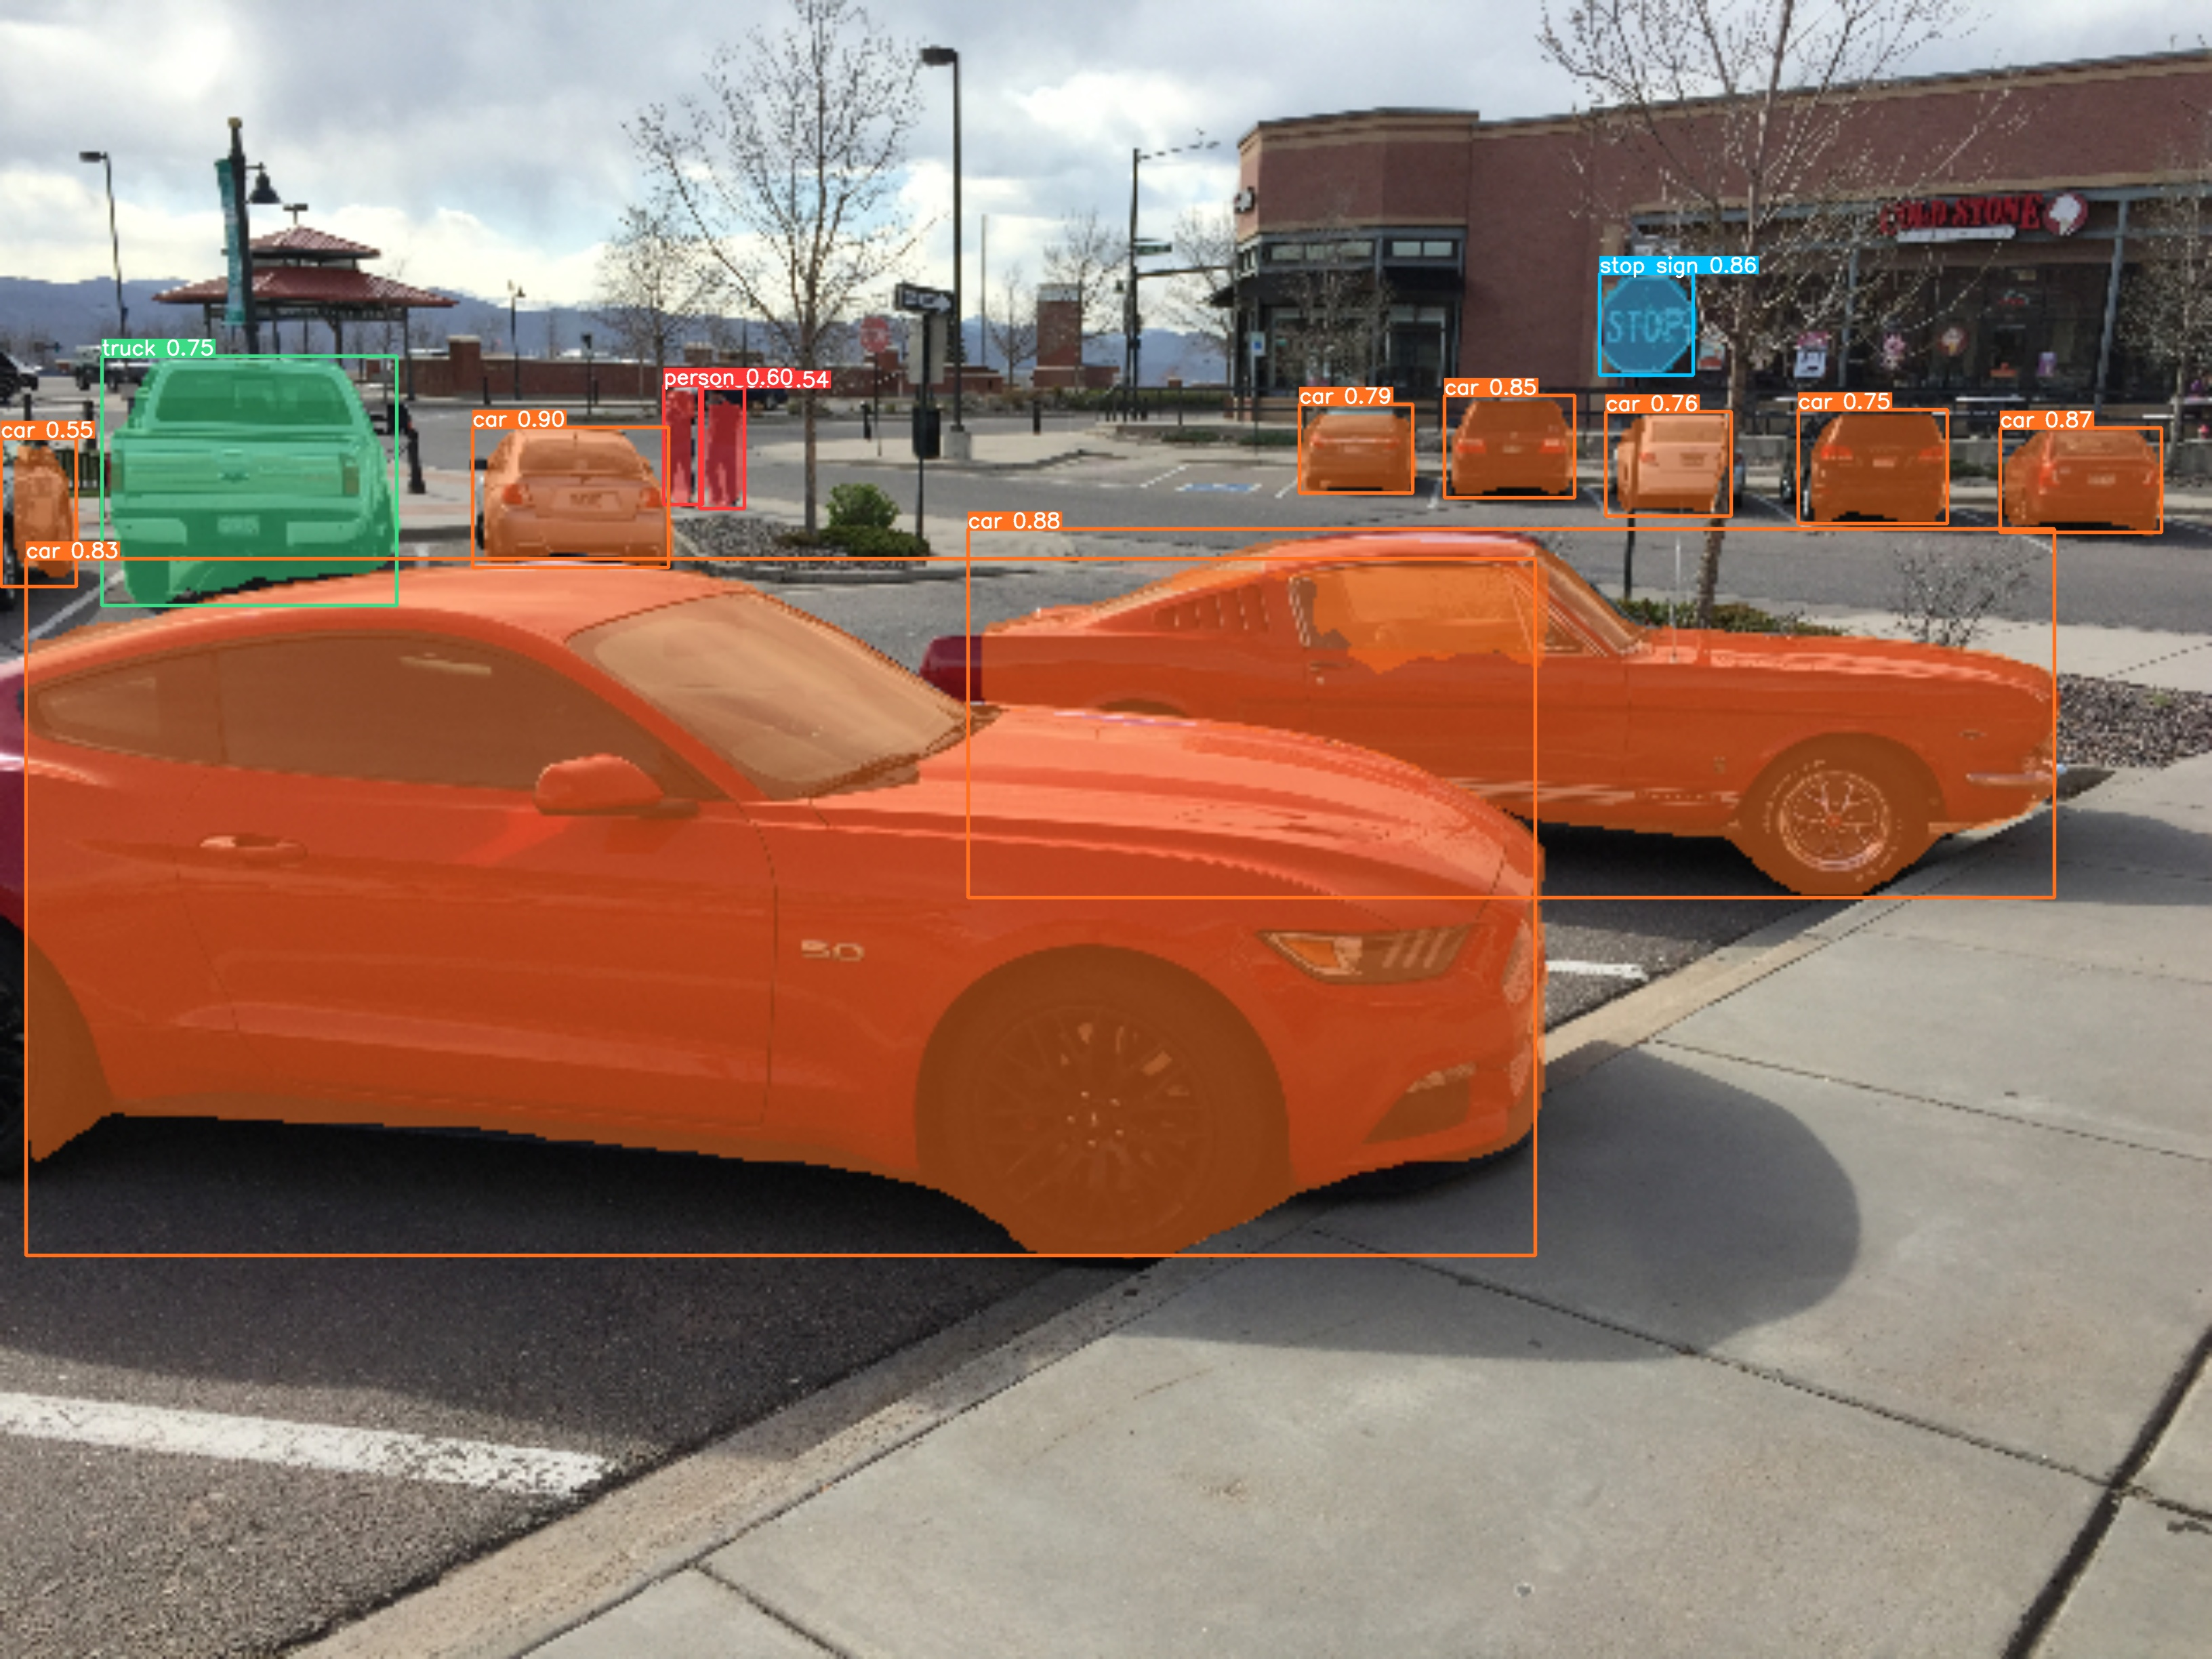

In [18]:
!python segment/predict.py --weights ./weights/yolov5s-seg.pt --source cars.jpg
display.Image(filename='runs/predict-seg/exp/cars.jpg', width=600)

In [ ]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="slldmx8xrMk1DVWU1sfA")
# project = rf.workspace("paul-guerrie-tang1").project("asl-poly-instance-seg")
# dataset = project.version(25).download("yolov5")

<h1>3. Train Model</h1>

In [49]:
!python segment/train.py --img 320 --batch 128 --epochs 100 --data ASL_Poly_Instance_Seg_25/data.yaml --weights yolov5s-seg.pt

segment\train: weights=yolov5s-seg.pt, cfg=, data=ASL_Poly_Instance_Seg_25/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=128, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train-seg, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github:  YOLOv5 is out of date by 1 commit. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5  v7.0-31-g443ef7f Python-3.9.13 torch-1.13.0 CUDA:0 (Quadro M1200, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0